In [2]:
import os
from collections import namedtuple

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', size=16)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss = ['-', '--', '-.', ':']

In [4]:
SAC_ROLLOUT_RETURN_FILENAME = "rollout_return.csv"
SAC_EVALUATION_FILENAME = "evaluation.csv"
SAC_MASKED_INDICES_FILENAME = "masked_indices.txt"
SAC_SEED_FILENAME = "seed.txt"

In [5]:
PD_READ_CSV_ARGS = {
    'header': None,
    'names':'index step return'.split()
}

In [6]:
BASE_DIR = "/home/ajc348/rds/hpc-work/dogo_results/d3rlpy/models/sac"

def load_results(result_path, file):
    return pd.read_csv(
        os.path.join(BASE_DIR, result_path.edir, result_path.pdir, result_path.cdir, file), **PD_READ_CSV_ARGS
    )

def load_text(result_path, file):
    with open(os.path.join(BASE_DIR, result_path.edir, result_path.pdir, file)) as f:
        entry =  f.readline()
    return entry

In [7]:
Experiment = namedtuple('Experiment', 'seed masked_indices')
ResultPath = namedtuple('ResultPath', 'edir pdir cdir')
ResultsRecord = namedtuple('ResultsRecord', 'seed masked_indices rollout_return evaluation')

In [8]:
RESULTS_MAP = {
    Experiment(1443, 'None'):   ResultPath('HalfCheetah-v2','2022.06.29-10:27:23','SAC_1443_20220629102726'),
    Experiment(1234, 'None'):   ResultPath('HalfCheetah-v2','2022.06.29-10:27:22','SAC_1234_20220629102726'),
    Experiment(1443, '3'):    ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:36','SAC_1443_3_20220628202937'),
    Experiment(1234, '3'):    ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:29','SAC_1234_3_20220628202930'),
    Experiment(1443, '7'):    ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:34','SAC_1443_7_20220628202935'),
    Experiment(1234, '7'):    ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:32','SAC_1234_7_20220628202933'),
    Experiment(1443, '9'):    ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:26','SAC_1443_9_20220628202928'),
    Experiment(1234, '9'):    ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:35','SAC_1234_9_20220628202936'),
    Experiment(1443, '12'):   ResultPath('HalfCheetah-v2-PO','2022.06.28-20:40:18','SAC_1443_12_20220628204019'),
    Experiment(1234, '12'):   ResultPath('HalfCheetah-v2-PO','2022.06.28-20:40:19','SAC_1234_12_20220628204020'),
    Experiment(1443, '16'):   ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:28','SAC_1443_16_20220628202930'),
    Experiment(1234, '16'):   ResultPath('HalfCheetah-v2-PO','2022.06.28-20:40:21','SAC_1234_16_20220628204022'),
    Experiment(1443, '9,10'): ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:27','SAC_1443_9,10_20220628202929'),
    Experiment(1234, '9,10'): ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:30','SAC_1234_9,10_20220628202930'),
    Experiment(1443, '3,12'): ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:31','SAC_1443_3,12_20220628202932'),
    Experiment(1234, '3,12'): ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:33','SAC_1234_3,12_20220628202934'),
    Experiment(1443, '3,9'):  ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:11','SAC_1443_3,9_20220628202912'),
    Experiment(1234, '3,9'):  ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:13','SAC_1234_3,9_20220628202914'),
    Experiment(1443, '3,16'): ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:10','SAC_1443_3,16_20220628202911'),
    Experiment(1234, '3,16'): ResultPath('HalfCheetah-v2-PO','2022.06.28-20:29:14','SAC_1234_3,16_20220628202915'),
}

In [11]:
evaluation_results = {
    k: ResultsRecord(
        seed = load_text(v, SAC_SEED_FILENAME),
        masked_indices = load_text(v, SAC_MASKED_INDICES_FILENAME),
        rollout_return = load_results(v, SAC_ROLLOUT_RETURN_FILENAME),
        evaluation = load_results(v, SAC_EVALUATION_FILENAME),
    )
    for k, v in RESULTS_MAP.items()
}

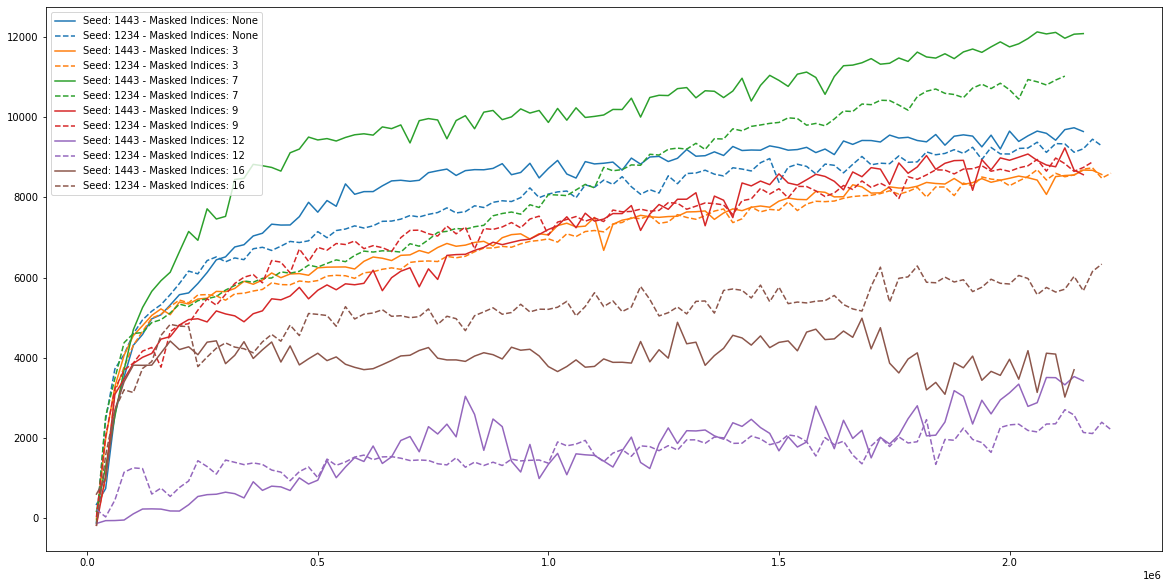

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

noise_std = 0.1
metric = 'evaluation'
for i, masked_indices in enumerate(['None', '3', '7', '9', '12', '16']):
    for j, seed in enumerate([1443, 1234]):
        experiment = Experiment(seed=seed, masked_indices=masked_indices)
        results_df = getattr(evaluation_results[experiment], metric)
        ax.plot(results_df['step'], results_df['return'], ls=lss[j], c=cols[i], label=f'Seed: {seed} - Masked Indices: {masked_indices}')
ax.legend()

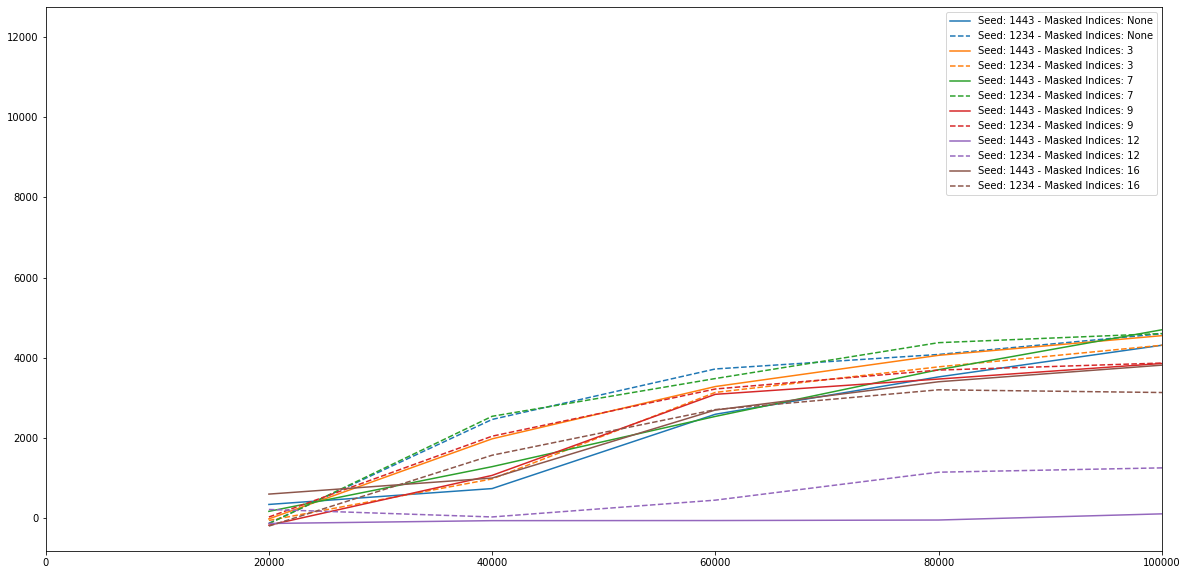

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

noise_std = 0.1
metric = 'evaluation'
for i, masked_indices in enumerate(['None', '3', '7', '9', '12', '16']):
    for j, seed in enumerate([1443, 1234]):
        experiment = Experiment(seed=seed, masked_indices=masked_indices)
        results_df = getattr(evaluation_results[experiment], metric)
        ax.plot(results_df['step'], results_df['return'], ls=lss[j], c=cols[i], label=f'Seed: {seed} - Masked Indices: {masked_indices}')
ax.set_xlim(0,100000)
ax.legend()

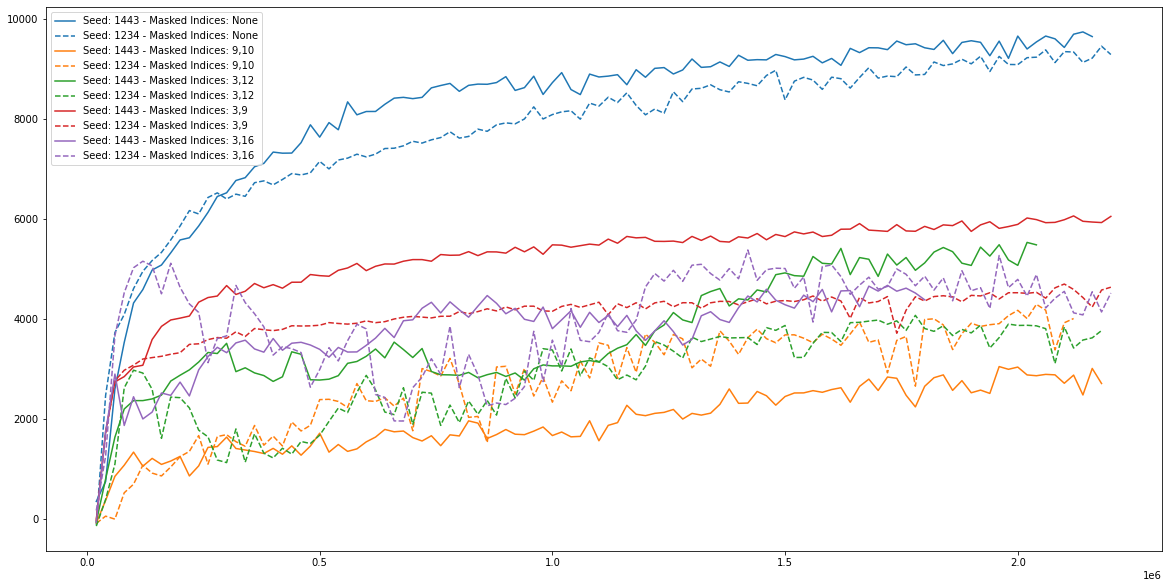

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

noise_std = 0.1
metric = 'evaluation'
for i, masked_indices in enumerate(['None', '9,10', '3,12', '3,9', '3,16']):
    for j, seed in enumerate([1443, 1234]):
        experiment = Experiment(seed=seed, masked_indices=masked_indices)
        results_df = getattr(evaluation_results[experiment], metric)
        ax.plot(results_df['step'], results_df['return'], ls=lss[j], c=cols[i], label=f'Seed: {seed} - Masked Indices: {masked_indices}')
ax.legend()

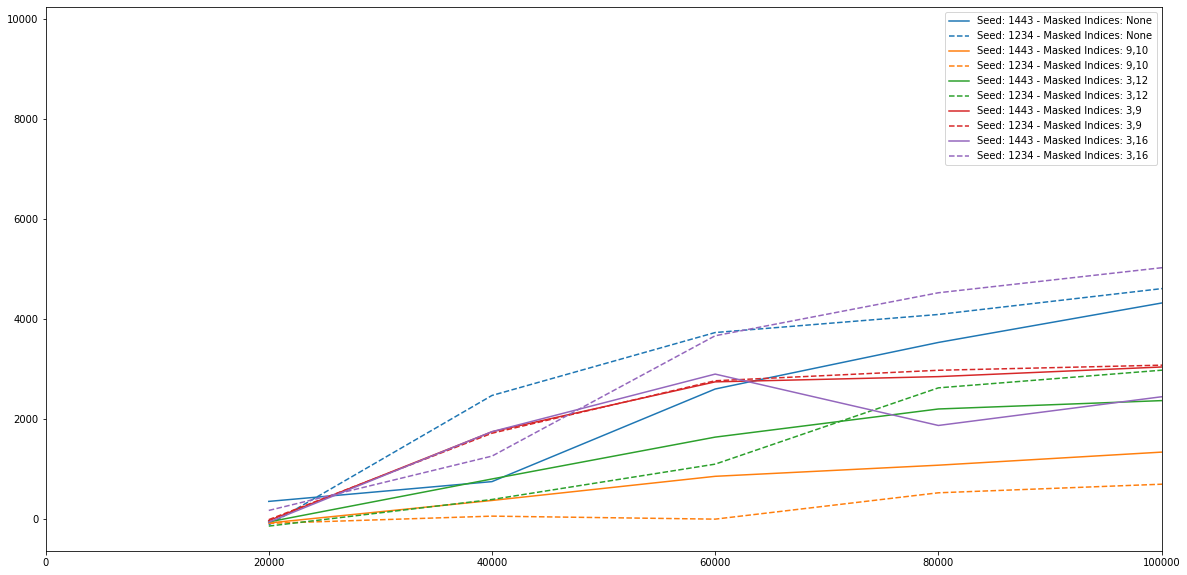

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

noise_std = 0.1
metric = 'evaluation'
for i, masked_indices in enumerate(['None', '9,10', '3,12', '3,9', '3,16']):
    for j, seed in enumerate([1443, 1234]):
        experiment = Experiment(seed=seed, masked_indices=masked_indices)
        results_df = getattr(evaluation_results[experiment], metric)
        ax.plot(results_df['step'], results_df['return'], ls=lss[j], c=cols[i], label=f'Seed: {seed} - Masked Indices: {masked_indices}')
ax.set_xlim(0,100000)
ax.legend()